In [13]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [14]:
from pathlib import Path

# Quantum computing

In [44]:
path = Path('/Users/olli/Desktop/Programming/Python/scripts/physics')

____

## Wave equation

![image](md_images/schrodinger.png)

## Motivation 

It has been estimated mathematically that Shor’s algorithm could be able to factor 
a 232-digit integer (RSA-232), one of the current largest integers, in a matter of seconds. 
Thus a practical quantum computer that can execute Shor’s algorithm will render 
current asymmetric cryptography useless. Keep in mind that asymmetric cryptography is 
used all over society: at the bank, for example, to encrypt data and accounts, at the Web 
to browse, communicate, you name it

![image](md_images/shors_algo.png)

## End of the transistor?

In [19]:
# transistor data from the book
transistor_dataframe = pd.DataFrame({'Year': [1995, 2001, 2010, 2014, 2019, 2021, 2025, 2030],
                                     'Size (nm)': [20, 10, 6, 7, 8, 5, 3, 0.5]})

In [33]:
# scipy will be very useful

from scipy.constants import nano, Planck, electron_mass, electron_volt

def engel_prob(E=4.5, V=5, N=1):
    """
    Set ups the probability function for quantum tunneling with:
    Barrier potential in eV
    Kinetic energy in eV
    """
    def aux(trans_thickness):
        a = trans_thickness*nano
        probability_wave_function = np.exp(-4*a * (N / Planck) * np.sqrt(
            2*electron_mass*(V-E)*electron_volt))
        return probability_wave_function

    return aux

In [34]:
# go through different kinetic energies
Kinetic_energies = np.linspace(4.5, 4.99, 4)
list_probabilities = []
KE_labels = []

for KE in Kinetic_energies:
    probability_function = engel_prob(KE)
    probability_vector = probability_function(
        transistor_dataframe.iloc[:, 1].values)*100
    list_probabilities.append(probability_vector)
    KE_labels.append(str(round(KE, 2)) + ' eV')

# turn probabilities into dataframe
probabilities_dataframe = pd.DataFrame(
    list_probabilities).transpose()
probabilities_dataframe.columns = KE_labels


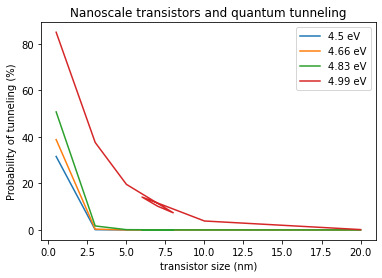

In [35]:
# Set up final data frame
data = pd.concat([transistor_dataframe, probabilities_dataframe], axis=1)
data.set_index('Size (nm)', inplace=True)

# plot
data.iloc[:, 1:].plot()
plt.xlabel('transistor size (nm)')
plt.ylabel('Probability of tunneling (%)')
plt.title('Nanoscale transistors and quantum tunneling')
plt.show()


### Possible futures of the transistor

* Molecular electronics: A field that generates much excitement. It 
promises to extend the limit of small-scale silicon-based integrated 
circuits by using molecular building blocks for the fabrication of 
electronic components.
*  This is a field of materials 
science concerning the design and application of organic molecules 
or polymers that show desirable electronic properties such as 
conductivity.
___

## Genesis of the quantum computer

Just like its classical cousin, **the qubit** can take a value of either 0 or 1. Physically, qubits 
can be represented as any two-level quantum systems such as
* The spin of a particle in a magnetic field where up means 0 and down 
means 1 or
* The polarization of a single photon where horizontal polarization 
means 1 and vertical polarization means 0. You can make a quantum 
computer out of light. How weird is that.

In both cases 0 and 1 are the only possible states. Geometrically, qubits can be 
visualized using a shape called the Bloch sphere, an instrument named after Swiss 
physicist Felix Bloch


### Bloch Sphere

Formally, the Bloch sphere is the geometrical representation in three-dimensional 
Hilbert space of the pure state of a two-level quantum system or qubit. The north and 
south poles of the sphere represent the standard basis vectors $|0>$ and $|1>$

![image](md_images/bloch_sphere.png)

Besides the basic vectors, the sphere can have something in between; this is called a **superposition** and it 
is essentially the probability for 0 or 1. The trick is that we can’t predict which it will be 
except at the instant of observation when the probability collapses into a definitive state.

## The power of superposition and quantum supremacy

All in all, superposition is a game changer. Let’s see why:

### 1 bit comparison
* A 1-bit classical computer *can be (or store) in 1 of 2 states* at a time*: **0 or 1**. 
* A 1-qubit quantum computer *can be (or store) in 2 states at a time*. That is 21 = 2.

### 2 bit comparison
* A 2-bit classical computer *can store only 1 out of 4 possible combinations* 
* A 2-qubit quantum computer *can store 4 possible values simultaneously*

**DEFINITION OF QUANTUM STORAGE POTENTIAL :** the number of values that can be stored simultaneously in a quantum 
computer would be 
___
Number of Values stored = $2\cdot n$, 

where $n$ is the _number of qubits_
___

|Bits/qubits | Classic storage (bytes)| Quantum storage (bits)| Quantum storage (bytes)|
|-----------|-----------|-----------|-----------|
|4| 1| 16| 2|
|8 |1 |256 |32|
|32 |4| 4294967296 |536870912|
|64 |8 |1.84467E+19 |2.30584E+18|